# Task 6.4 Supervised Machine Learning: Regression

## Contents
    01.Importing Libraries & Data
    02.Data Cleaning
    03.Data prep for regression analysis
    04.Regression analysis
    Bonus: performance improvement after removing outliers?

### 01.Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#defining path to project folder
path=r'C:\Users\rache\Documents\House Sales Analysis'

In [4]:
#importing house_sales_upd2.pkl
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_upd2.pkl'))

### 02.Data Cleaning

In [5]:
df.columns

Index(['Index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Home Size Category'],
      dtype='object')

In [6]:
df.head(20)

,Index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Home Size Category
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,False,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Small
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,False,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Moderate
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,False,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Small
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,False,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Moderate
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Small
5,5,7237550310,5/12/2014,1225000,4,4.50,5420,101930,1.0,False,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Large
6,6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,False,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Small
7,7,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,False,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Small
8,8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,False,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Small
9,9,3793500160,3/12/2015,323000,3,2.50,1890,6560,2.0,False,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Moderate


In [7]:
df.shape

(21613, 23)

In [8]:
#checking for missing values
df.isnull().sum() #No missing values!

Index                 0
id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
Home Size Category    0
dtype: int64

In [10]:
#checking for duplicate values
dups=df.duplicated()
dups.shape #no duplicates!

(21613,)

C:\Users\rache\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

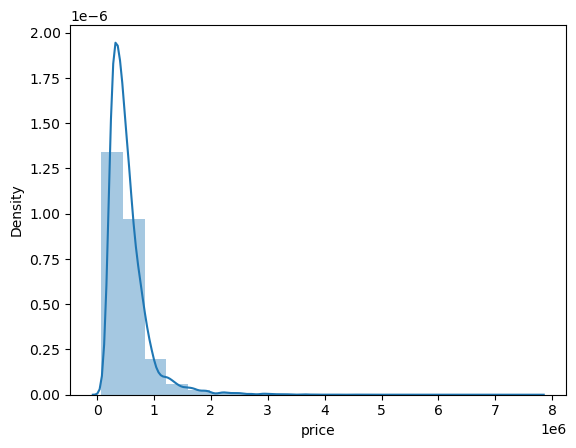

In [14]:
#checking for extreme values
sns.distplot(df['price'],bins=20)

In [16]:
#checking price max value
df['price'].max()

7700000

In [17]:
#checking price min value
df['price'].min()

75000

In [18]:
#checking price mean value
df['price'].mean()

540088.1417665294

### 03.Data prep for regression analysis

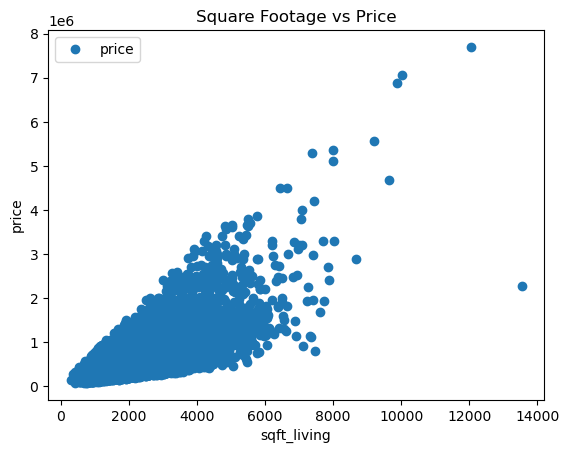

In [25]:
#creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'sqft_living', y='price',style='o') #the style option creates a scatterplot; without it, we only have lines.
plt.title('Square Footage vs Price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [21]:
#reshaping the variables into NumPy arrays and separate objects.
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [22]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [23]:
y

array([[221900],
       [538000],
       [180000],
       ...,
       [402101],
       [400000],
       [325000]], dtype=int64)

In [24]:
#splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Hypothesis
    The more square footage a home has, the higher the price will be.

### 04.Regression analysis

In [26]:
#creating a regression object
regression=LinearRegression()  #this is the regression object, which will be fit onto the training set.

In [27]:
#fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
#predict the values of y using X.
y_predicted=regression.predict(X_test)

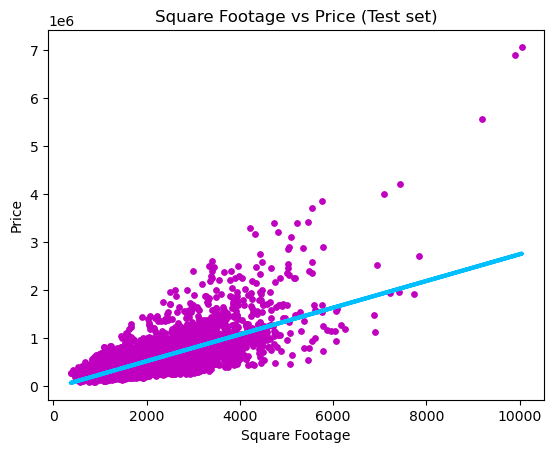

In [29]:
#creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='m', s=15)
plot_test.plot(X_test, y_predicted, color='deepskyblue', linewidth =3)
plot_test.title('Square Footage vs Price (Test set)')
plot_test.xlabel('Square Footage')
plot_test.ylabel('Price')
plot_test.show()

The line doesn't appear to fit the data super well.  On the lower end it might be okay but as the square footage increases, the line seems to match less and less.

In [30]:
#creating objects that contain the model summary statistics
rmse=mean_squared_error(y_test, y_predicted) #this is the mean squared error
r2=r2_score(y_test, y_predicted) #this is the R2 score.

In [31]:
#printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.11592
R2 score:  0.48889929019453016


In [32]:
y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       ...,
       [ 560512.90534826],
       [ 374032.73903242],
       [ 329500.16200177]])

In [33]:
#creating a dataframe comparing the actual and predicted values of y
data=pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000,3.601163e+05
1,1578000,1.261901e+06
2,562100,3.628996e+05
3,631500,2.766177e+05
4,780000,8.471914e+05
5,485000,4.213486e+05
6,340000,4.408316e+05
7,335606,6.685044e+05
8,425000,6.467948e+05
9,490000,1.203452e+06


The summary statistics show the model is extremely inaccurate. The R2 score of 0.48889 indicates a medium to poor fit but the MSE value seems astronomically high. Performance may improve if extreme outliers are removed.

##### Compare how the regression fits the training set

In [34]:
#predict
y_predicted_train=regression.predict(X_train) #this is predicting X_train

In [35]:
rmse=mean_squared_error(y_train, y_predicted_train)
r2=r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91106
R2 score:  0.49453356717789776


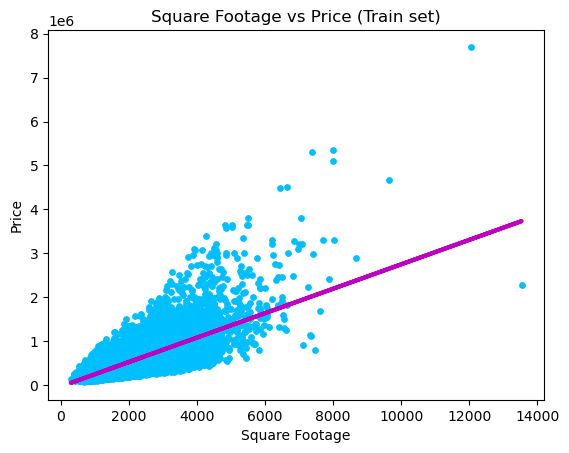

In [37]:
#visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='deepskyblue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='m', linewidth =3)
plot_test.title('Square Footage vs Price (Train set)')
plot_test.xlabel('Square Footage')
plot_test.ylabel('Price')
plot_test.show()

### Bonus: performance improvement after removing outliers?

In [38]:
#cleaning the extreme values from the "price" variable observed during the consistency checks.
df_test=df[df['price'] <=550000] 

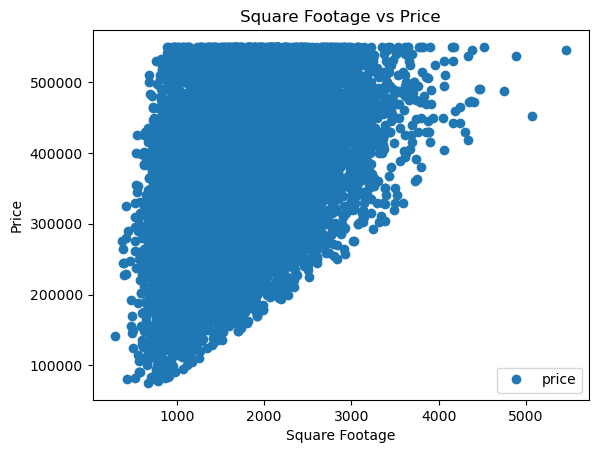

In [39]:
#testing how the scatterplot looks without outliers
df_test.plot(x = 'sqft_living', y='price', style='o')  
plt.title('Square Footage vs Price')  
plt.xlabel('Square Footage')  
plt.ylabel('Price')  
plt.show()

In [40]:
#reshaping again
X_2=df_test['sqft_living'].values.reshape(-1,1)
y_2=df_test['price'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
#run and fit the regression
regression=LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
#predict
y_predicted_2=regression.predict(X_test_2)

In [44]:
rmse=mean_squared_error(y_test_2, y_predicted_2)
r2=r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[68.28830296]]
Mean squared error:  9371911937.83024
R2 score:  0.144223910237555


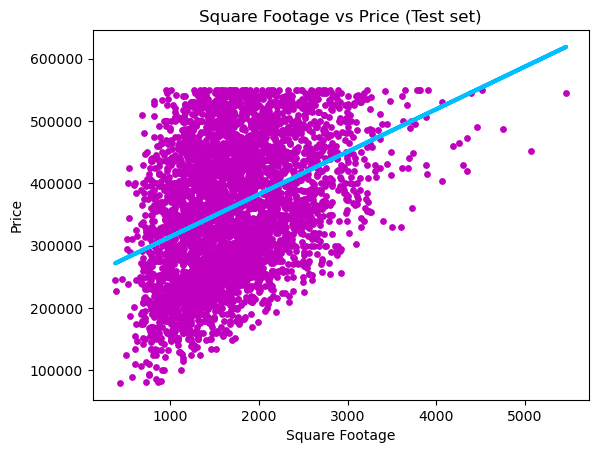

In [46]:
#visualizing the test set results
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='m', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='deepskyblue', linewidth =3)
plot_test.title('Square Footage vs Price (Test set)')
plot_test.xlabel('Square Footage')
plot_test.ylabel('Price')
plot_test.show()

In [47]:
data=pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,300000,301770.364276
1,420000,335231.632728
2,261350,340694.696966
3,497000,345474.878173
4,320000,322256.855165
5,455000,366644.252092
6,320000,358449.655736
7,300000,344791.995143
8,325000,376887.497537
9,460000,368010.018151


The new test is better but still not great. the R2 value is still closer to 0 than 1 meaning it is a poor fit. The slope is much smaller and the MSE is also much smaller but still very large.